In [7]:
import numpy as np  # linear algebra
import pandas as pd  # for data processing
import os

marketing_df = pd.read_csv('marketing_AB.csv')
marketing_df.head()


,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [9]:
import warnings 
warnings.filterwarnings('ignore')

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
marketing_df.describe(include='all')

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
count,588101.000000,5.881010e+05,588101,588101,588101.000000,588101,588101.000000
unique,NaN,NaN,2,2,NaN,7,NaN
top,NaN,NaN,ad,False,NaN,Friday,NaN
freq,NaN,NaN,564577,573258,NaN,92608,NaN
mean,294050.000000,1.310692e+06,NaN,NaN,24.820876,NaN,14.469061
std,169770.279667,2.022260e+05,NaN,NaN,43.715181,NaN,4.834634
min,0.000000,9.000000e+05,NaN,NaN,1.000000,NaN,0.000000
25%,147025.000000,1.143190e+06,NaN,NaN,4.000000,NaN,11.000000
50%,294050.000000,1.313725e+06,NaN,NaN,13.000000,NaN,14.000000
75%,441075.000000,1.484088e+06,NaN,NaN,27.000000,NaN,18.000000


In [19]:
marketing_df.isnull().sum()

Unnamed: 0       0
user id          0
test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [23]:
numerical_features=[feature for feature in marketing_df.columns if marketing_df[feature].dtype!='O']
numerical_features

['Unnamed: 0', 'user id', 'converted', 'total ads', 'most ads hour']

In [25]:
categorical_features=[feature for feature in marketing_df.columns if marketing_df[feature].dtype=='O']
categorical_features

['test group', 'most ads day']

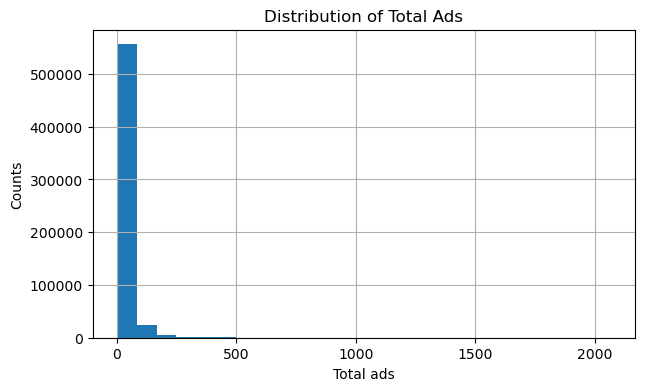

In [29]:
plt.figure(figsize=(7,4))
marketing_df['total ads'].hist(bins=25)
plt.xlabel('Total ads')
plt.ylabel('Counts')
plt.title('Distribution of Total Ads')
plt.show()

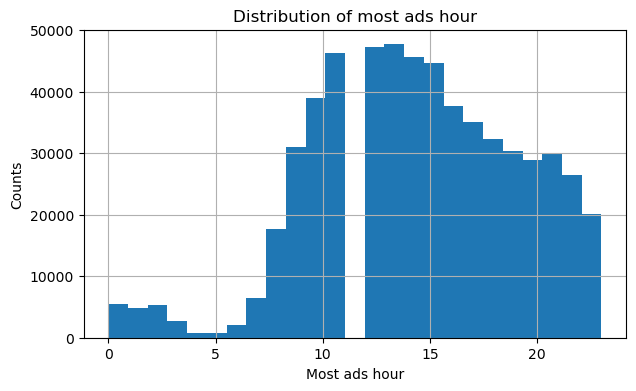

In [31]:
plt.figure(figsize=(7,4))
marketing_df['most ads hour'].hist(bins=25)
plt.xlabel('Most ads hour')
plt.ylabel('Counts')
plt.title('Distribution of most ads hour')
plt.show()

# A/B testing

In [ ]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# Remove unnecessary column if present
marketing_df = marketing_df.drop(columns=["Unnamed: 0"], errors="ignore")

# Check unique values in the "test group" column
print("Unique test groups:", marketing_df["test group"].unique())

# Compute conversion counts and total users per group
conversion_counts = marketing_df.groupby("test group")["converted"].sum()
total_counts = marketing_df["test group"].value_counts()

# Compute conversion rates
conversion_rates = conversion_counts / total_counts
print("Conversion Rates:\n", conversion_rates)

# Perform two-proportion Z-test
successes = [conversion_counts["ad"], conversion_counts["psa"]]
samples = [total_counts["ad"], total_counts["psa"]]
z_stat, p_value = proportions_ztest(successes, samples)

# Display results
print(f"Z-Statistic: {z_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in conversion rates.")
else:
    print("Fail to reject the null hypothesis: No significant difference in conversion rates.")